In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import common
common.regression_test()

Built sparse matrix with 2 equations and 2 variables
Building sparse matrix: Wall time: 0.00s, CPU time: 0.00s, Avg CPUs: 0.00/64
The unconstrained solution is optimal.
Final cost 1.9722e-30, first-order optimality 2.66e-15
Solving sparse matrix: Wall time: 0.00s, CPU time: 0.00s, Avg CPUs: 0.00/64
Building equations: Wall time: 0.00s, CPU time: 0.00s, Avg CPUs: 0.00/64
Built sparse matrix with 10 equations and 8 variables
Building sparse matrix: Wall time: 0.00s, CPU time: 0.00s, Avg CPUs: 0.00/64
The unconstrained solution is optimal.
Final cost 5.2385e-31, first-order optimality 6.66e-16
Solving sparse matrix: Wall time: 0.00s, CPU time: 0.00s, Avg CPUs: 0.00/64
Number of elements less than 0 or greater than 1: 0


# Low resolution haze detection v1

Results look good, but it requires subsampling and there's a 5000x performance cliff between 600 and 726 pixels, for the sample image
![Performance Chart](https://docs.google.com/spreadsheets/d/1VZqHtatv2zCw0UsI8FsD_WXfeI_6b4PR6LFLl-2Dnt8/pubchart?oid=801690291&format=image)

Source: https://docs.google.com/spreadsheets/d/1VZqHtatv2zCw0UsI8FsD_WXfeI_6b4PR6LFLl-2Dnt8/edit?gid=0#gid=0


(22, 33, 4)


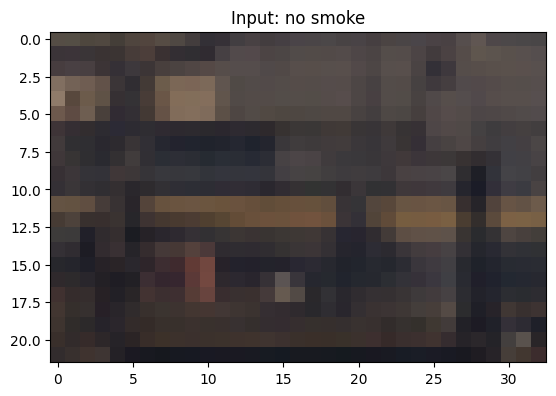

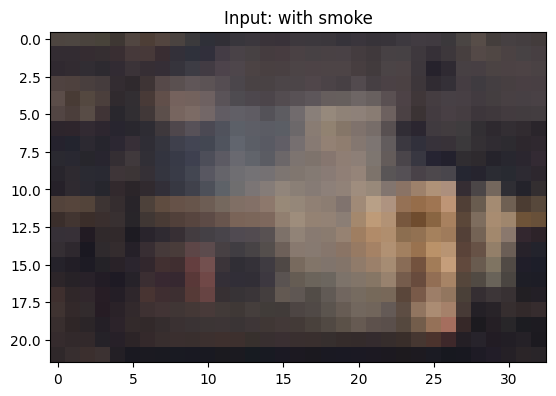

Building equations: Wall time: 0.01s, CPU time: 0.00s, Avg CPUs: 0.00/64
Built sparse matrix with 7766 equations and 2904 variables
Building sparse matrix: Wall time: 0.01s, CPU time: 0.01s, Avg CPUs: 1.33/64
   Iteration        Cost      Cost reduction    Step norm     Optimality   
       0         1.0772e+01                                    1.00e-02    
       1         2.6633e+00      8.11e+00       8.71e+00       2.51e-03    
       2         6.5120e-01      2.01e+00       4.35e+00       6.27e-04    
       3         1.5574e-01      4.95e-01       2.18e+00       1.57e-04    
       4         3.5647e-02      1.20e-01       1.09e+00       3.92e-05    
       5         7.4899e-03      2.82e-02       5.41e-01       9.77e-06    
       6         1.3497e-03      6.14e-03       2.67e-01       2.43e-06    
       7         2.0994e-04      1.14e-03       1.26e-01       5.92e-07    
       8         6.0275e-05      1.50e-04       4.79e-02       1.35e-07    
       9         5.0360e-05    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.0112319538263253e-31..95.76781607305696].


      17         3.9614e-05      4.18e-18       3.56e-08       1.64e-12    
The first-order optimality measure is less than `tol`.
Number of iterations 18, initial cost 1.0772e+01, final cost 3.9614e-05, first-order optimality 1.64e-12.
Solving sparse matrix: Wall time: 4.44s, CPU time: 281.40s, Avg CPUs: 63.33/64
Number of elements less than 0 or greater than 1: 0


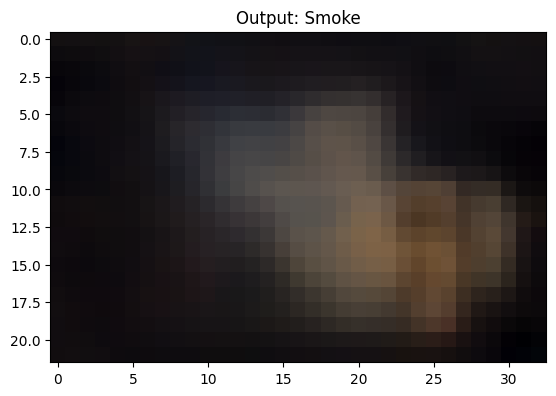

In [5]:
def low_resolution_haze_detection_v1():
    subsample = 12
    url0 = "https://thumbnails-v2.createlab.org/thumbnail?root=https%3A%2F%2Fbreathecam.org%2F%23v%3D4654%2C2127%2C4915%2C2322%2Cpts%26t%3D1015.36%26ps%3D0%26bt%3D20240519140924%26et%3D20240519140924%26startDwell%3D0%26endDwell%3D0%26d%3D2024-05-19%26s%3Dclairton4%26fps%3D9&width=400&height=300&format=png&fps=9&tileFormat=mp4&startDwell=0&endDwell=0&fromScreenshot&minimalUI"
    im0 = common.read_image_from_url(url0, subsample=subsample) / 255.0
    print(im0.shape)
    plt.title("Input: no smoke")
    plt.imshow(im0 * 255.0)
    plt.show()
    url1 = "https://thumbnails-v2.createlab.org/thumbnail?root=https%3A%2F%2Fbreathecam.org%2F%23v%3D4654%2C2127%2C4915%2C2322%2Cpts%26t%3D984.02%26ps%3D0%26bt%3D20240519135036%26et%3D20240519135036%26startDwell%3D0%26endDwell%3D0%26d%3D2024-05-19%26s%3Dclairton4%26fps%3D9&width=400&height=300&format=png&fps=9&tileFormat=mp4&startDwell=0&endDwell=0&fromScreenshot&minimalUI"
    im1 = common.read_image_from_url(url1, subsample=subsample) / 255.0
    plt.title("Input: with smoke")
    plt.imshow(im1 * 255.0)
    plt.show()
    haze_image = common.solve_haze_detection_v1(im0, im1)
    plt.title("Output: Smoke")
    plt.imshow(haze_image * 255.0)
    plt.show()

low_resolution_haze_detection_v1()